In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data**

In [2]:
url = 'https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_2/D1.csv'

dataframe = pd.read_csv(url)

In [3]:
dataframe.head()

,Time,Ads
0,13-09-2017 00:00,80115
1,13-09-2017 01:00,79885
2,13-09-2017 02:00,89325
3,13-09-2017 03:00,101930
4,13-09-2017 04:00,121630


**Single Exponential Smoothing without inbuilt function**

In [4]:
alpha_array = [0.5,0.7,0.95]
gamma_array = [0.06,0.03,0.01]

**Function for single exponential smoothing**

In [5]:
def dataset_with_interval(dataset):
  s1 = dataset[0]
  b1 = (dataset[-1] - dataset[0])/(len(dataset)-1)
  forecasted_list=[]
  mse_list = []
  complete_fc_val_list=[]
  for alpha in alpha_array:
    for gamma in gamma_array:
      s = [s1]
      b = [b1]
      f = []
      for i in range(len(dataset)):
        if (i<(len(dataset)-1)):
          st = alpha*(dataset[i+1]) + ((1-alpha)*(s[i]+b[i]))
          s.append(st)       
          bt = gamma*(s[i+1]-s[i]) + (1-gamma)*b[i] 
          b.append(bt)   
          ft = st+bt
          f.append(ft)

      f.insert(0,s1)
      fc_s = f.copy()
      forecasted_list.append(f[-1])
      complete_fc_val_list.append(fc_s)

      cp_df = dataset.copy()
      cp_df = np.c_[ cp_df, f ] 
      error_array = cp_df[:,0] - cp_df[:,1]
      cp_df = np.c_[ cp_df, error_array ]
      sqer_arr = (cp_df[:,2])**2
      cp_df = np.c_[cp_df,sqer_arr]

      MSE = np.sum(cp_df[1:len(dataset),3])/(len(cp_df)-1) 
      mse_list.append(MSE)

  return mse_list,forecasted_list,complete_fc_val_list

**Different interval data array**

In [6]:
data= dataframe.values
dataset_array = [data[0::1][:,1],data[0::2][:,1],data[0::4][:,1],data[0::8][:,1],data[0::12][:,1],data[0::24][:,1],data[0::48][:,1]]


**Different interval time array**

In [7]:
time_array = []
for d in dataset_array:
  t = range(d.shape[0])
  time_array.append(t)

**Function call for MSE and prediction calculations**

In [8]:
final_mse_list = []
final_forecasted_list = []
final_fc_val_list = []
for df in dataset_array:
  mse_list,forecasted_list,complete_fc_val_list = dataset_with_interval(df)
  final_mse_list.append(mse_list)
  final_fc_val_list.append(complete_fc_val_list)
  final_forecasted_list.append(forecasted_list)

In [9]:

final_mse_list 

[[78598874.30266975,
  76148442.92697203,
  74692215.99026841,
  19863549.32262927,
  18910880.357932538,
  18811332.71474246,
  2738726.3850072906,
  932311.245828559,
  417502.0934384677],
 [159504921.0253715,
  156601801.58035603,
  154976416.28115013,
  45871795.934580304,
  46055571.861975275,
  46631887.213552095,
  2962455.202907849,
  1439625.0187951059,
  1112321.978748621],
 [240102655.27611548,
  241152602.60647812,
  241598252.82806322,
  87312591.49485898,
  90267577.15061104,
  92325957.62597829,
  3835515.0762063586,
  3247186.1663859575,
  3401458.1190829743],
 [384241259.6242625,
  391703261.6887969,
  396727525.9999262,
  158886162.9859709,
  167416236.77987415,
  173379488.11218363,
  9097811.373604627,
  10507327.91120711,
  12404870.020613568],
 [606792311.841582,
  619446218.1796467,
  627042212.9056828,
  268507118.6097933,
  283419422.44531393,
  293201947.16154146,
  18051402.38797821,
  21647786.759707026,
  24988282.074636847],
 [10616819.687287463,
  1115614

In [10]:
final_forecasted_list

[[92186.05365336481,
  93362.77787613645,
  93987.28600974,
  83508.80000737424,
  85020.53235277713,
  85916.84934332666,
  78443.48426077733,
  79817.81066392934,
  80684.28700641594],
 [116900.70219571367,
  116375.71686105257,
  116338.67479642178,
  105906.25605157987,
  106183.94338581274,
  106527.73230996564,
  95126.61034165724,
  95951.26260427931,
  96593.50792000596],
 [132356.11378995262,
  132411.35728548592,
  132758.32615466442,
  131520.47940506463,
  131390.30178311781,
  131529.59241680722,
  125160.78170564103,
  125344.56783508188,
  125612.32054592061],
 [126547.72889945908,
  128135.95225444058,
  129454.3660574087,
  137482.41265633816,
  138059.89723848968,
  138706.0005848598,
  152660.11080675473,
  152284.22201046828,
  152266.34580965753],
 [125305.82126744042,
  127086.54626725802,
  128251.37304465713,
  132187.4594614518,
  133205.01068665032,
  133941.6421689392,
  146844.12486526676,
  146896.94352651108,
  147025.68478941152],
 [73354.42000131855,
  7

In [11]:
min_idx=[]
for minval in final_mse_list: 
  minidx = minval.index(min(minval))
  min_idx.append(minidx)

In [12]:

interval_arr = [1,2,4,8,12,24,48]

**Plotting function for predicted values ad actual values**

In [13]:
def plotting_function(fc_val,data_val,time_val,interval_val):
  fig = plt.gcf()
  plt.plot(time_val,data_val,color='g',label='Original')
  plt.plot(time_val,fc_val,color='r',label='Forcasted')
  fig.set_size_inches(12,8)
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Ads')
  plt.title('Prediction at '+str(interval_val)+' hour interval at the least MSE')
  plt.figure()
  plt.close

**Plotting of predicted values and actual values for different intervals**

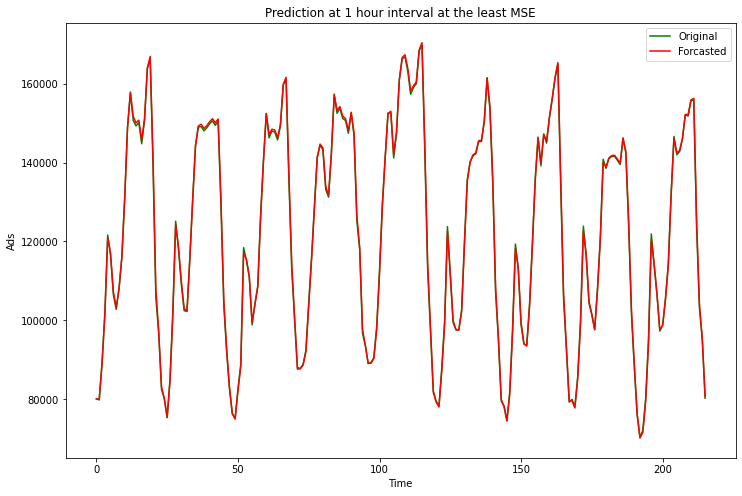

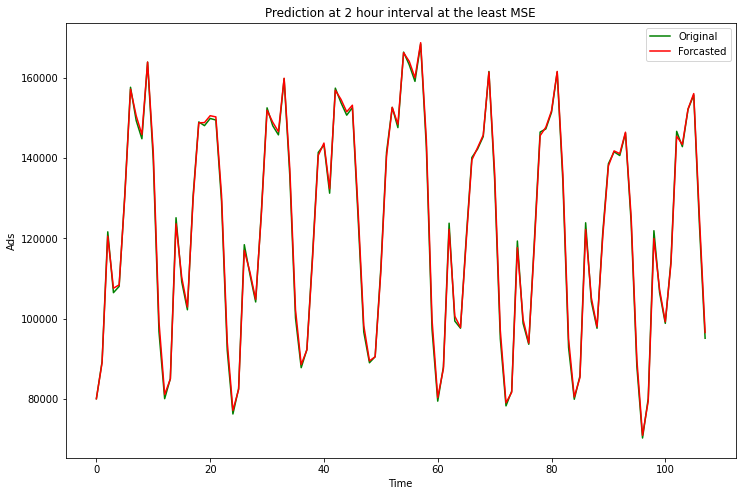

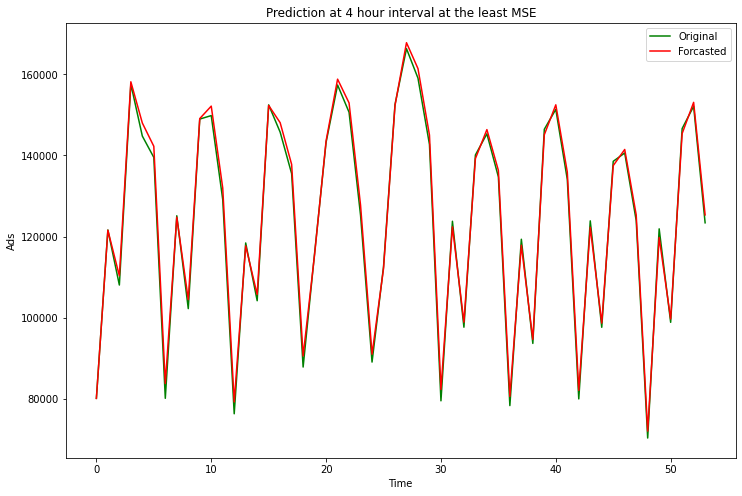

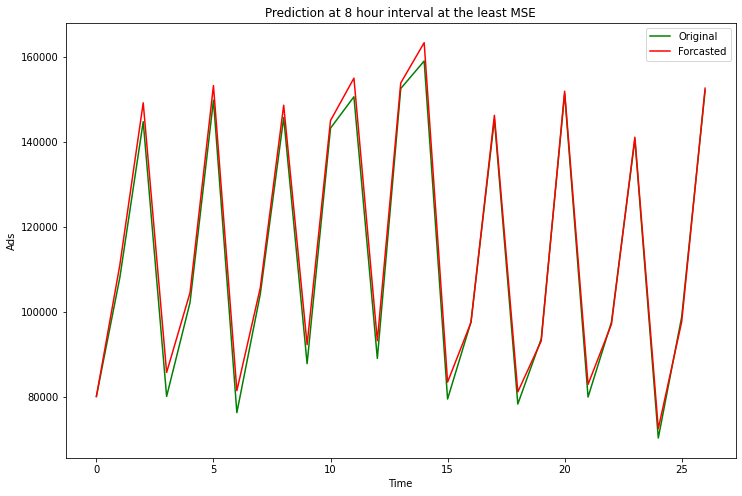

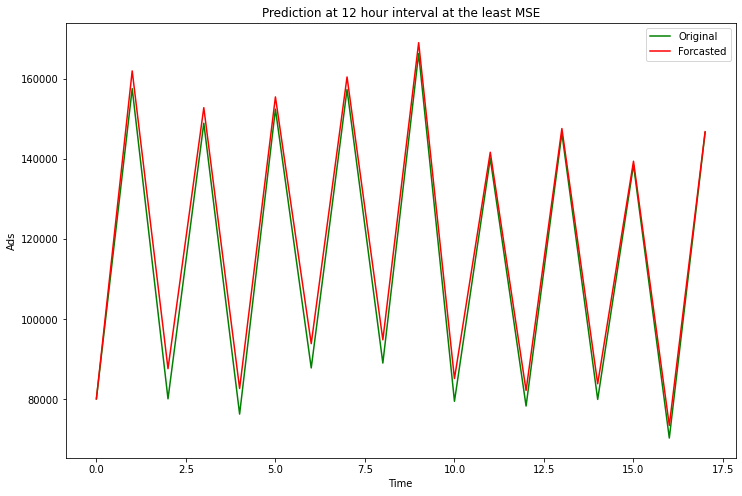

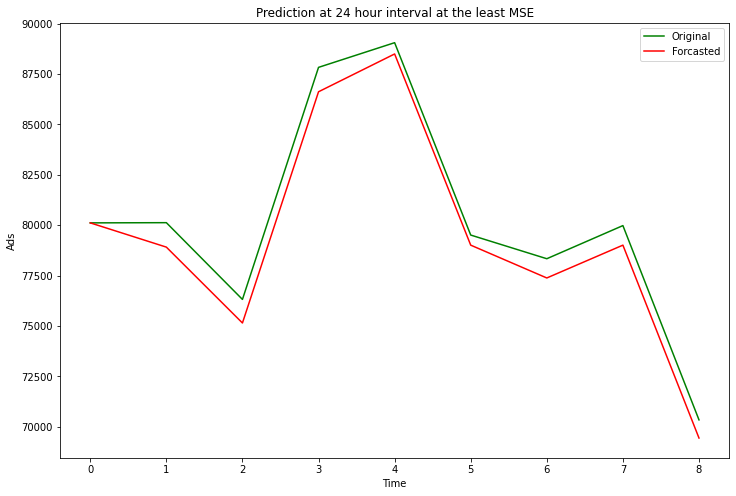

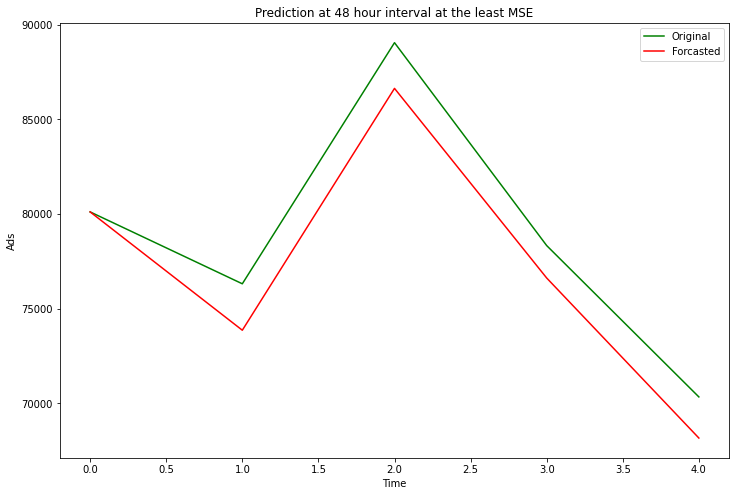

<Figure size 432x288 with 0 Axes>

In [14]:
for fc_idx in range(7):
  plotting_function(final_fc_val_list[fc_idx][min_idx[fc_idx]],dataset_array[fc_idx],time_array[fc_idx],interval_arr[fc_idx])  

**Table of Least MSE value for each interval**

In [15]:
from tabulate import tabulate

tab_array = []
for n in range(7):
  tab = [(interval_arr[n]),final_mse_list[n][min_idx[n]]]
  tab_array.append(tab)

table = tabulate(tab_array, headers=['interval(in hours)', 'Least MSE'], tablefmt='orgtbl')

print(table)

|   interval(in hours) |        Least MSE |
|----------------------+------------------|
|                    1 | 417502           |
|                    2 |      1.11232e+06 |
|                    4 |      3.24719e+06 |
|                    8 |      9.09781e+06 |
|                   12 |      1.80514e+07 |
|                   24 | 942769           |
|                   48 |      4.88068e+06 |


**Plotting of MSE at different intervals**

In [16]:

def mse_plotting_func(inter_val,mseval):
  fig = plt.gcf()
  ax = fig.add_axes([0,0,1,1])
  rects = ax.bar(inter_val,round(mseval,2),color='b')
  for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 
  fig.set_size_inches(12,8)
  plt.xlabel('Interval(in hours)')
  plt.ylabel('MSE')
  plt.title('MSE VS Interval')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


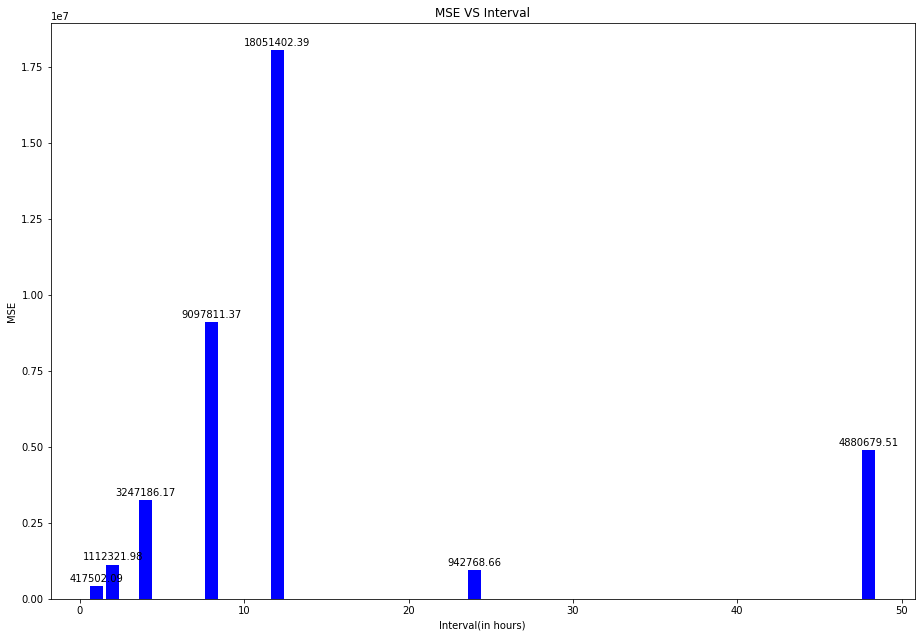

In [17]:
for idx in range(7):
  mse_plotting_func(interval_arr[idx],final_mse_list[idx][min_idx[idx]])

**Comparing forecasted values with inbuilt function**

In [18]:
from sklearn.metrics import mean_squared_error

model = Holt(dataframe['Ads'])

dataframe['pred_val'] = model.fit(smoothing_level=0.9,smoothing_slope=.01,optimized=False).fittedvalues.shift(0)
MSE = mean_squared_error(dataframe.pred_val.dropna(),dataframe['Ads'])

In [19]:
print('MSE (inbuilt function): ',MSE)
print('MSE (own function): ',final_mse_list[0][min_idx[0]])

MSE (inbuilt function):  159951933.1831789
MSE (own function):  417502.0934384677


In [21]:
print('Difference in error: ',abs(final_mse_list[0][min_idx[0]]-MSE))

Difference in error:  159534431.08974043
